<a href="https://colab.research.google.com/github/adauphin/tutorial-on-deep-neural-networks-with-keras/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Tutorial on deep neural networks and deep convolutionnal neural networks</h1>

---

**Alexandre Dauphin**

# Import the libraries

In [0]:
# import numpy and matplotlib

import numpy as np
from matplotlib import pyplot as plt

#import keras and tools from keras to generate neural networks and convolutionnal neural networks

import keras
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten, Activation, BatchNormalization, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

# import the dataset

from keras.datasets import mnist

# scikit learn

from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#miscellaneous

from collections import Counter

Using TensorFlow backend.


# Link the colab file to your google drive

---

By executing the next cell, we will be able to access and write data on the google drive

In [0]:
#link the google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# MNIST dataset
---
We now import the MNIST hanwritten digits and explore it. We first load the data

In [0]:
n_classes=10 #number of classes in the MNIST dataset, numbers from 0 to 9

(x_train,y_train1), (x_test,y_test1) = mnist.load_data()
x_train1 = x_train.astype('float32') / 255.
x_test1 = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

y_train = np_utils.to_categorical(y_train1, n_classes) # this keras funtion transforms the labels into vectors. For example, 2 becomes [0,0,1,0,0,0,0,0,0,0]
y_test = np_utils.to_categorical(y_test1, n_classes)

11493376/11490434 [==============================] - 1s 0us/step


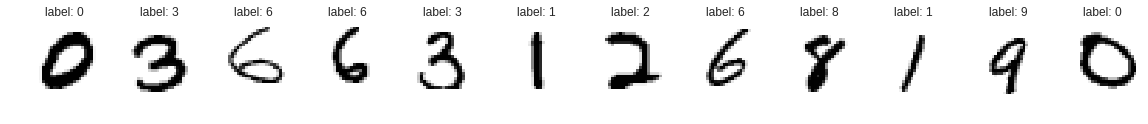

In [0]:
# We take 12 examples in the training set
nexample=12
mask=np.random.randint(x_train.shape[0],size=nexample)

fig,axes=plt.subplots(nrows=1,ncols=nexample,figsize=(20,20))

i=-1
for ax in axes.flat:
  i=i+1
  nn=mask[i]
  ax.imshow(x_train1[nn,:,:],cmap='gray_r')
  ax.set_title('label: '+str(y_train1[nn]))
  ax.axis('off')

# Deep neural networks (Fully connected)



We now construct our first neural network. The input of the neural network is a vector of 28X28=784 elements. We then make the data pass through 3 hidden fully connected neural networks with repectively 200, 64 and 10 neurons. We finally perform the classification in the last layer with a softmax function. 

Then, we compile model the model and we specify the Cost function (here cross entropy), the optimizer (adam, an elaborated version of the stochastic gradient descent), and the metrics.


Your goal is now to construct the neural network architecture. We will do it in keras

https://keras.io/#getting-started-30-seconds-to-keras

In [0]:
#@title Solution (double click to see the code)

model = Sequential()
model.add(Dense(units=200, input_dim=784,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                12864     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 170,514
Trainable params: 170,514
Non-trainable params: 0
_________________________________________________________________


We now train the model. To this end, we use the function model.fit(). The latter allows one to choose the batch size and the division between training and validation set.
We put some checkpoints that will save the weigths of the neural network after each epoch. We also save the history after the training to have access to the learning curves (loss function and accuracy)

In [0]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights.best.hdf5')
# checkpoint
filepath="drive/My Drive/weights_fnn.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch

history=model.fit(x_train, y_train, epochs=40, batch_size=128,validation_split=0.2,callbacks=callbacks_list,verbose=1)

np.savez('drive/My Drive/history_fnn.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 3s 56us/step - loss: 14.4773 - acc: 0.1018 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 2/40
48000/48000 [==============================] - 2s 48us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 3/40
48000/48000 [==============================] - 2s 49us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 4/40
48000/48000 [==============================] - 2s 49us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 5/40
48000/48000 [==============================] - 2s 50us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 6/40
30336/48000 [=================>............] - ETA: 0s - loss: 14.5061 - acc: 0.1000

KeyboardInterrupt: ignored

Let's have a look at the learning curves. To this end, we load the history that we previously saved.

In [0]:
data=np.load('drive/My Drive/history_fnn.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[20:],loss[20:],'.--',label='training')
ax.plot(vepochs[20:],val_loss[20:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();

We now want visualize the effect of the different layers on the original data from the test set. To this end, we first perform a PCA on the original data to visualize in a 2D plane the data.

- use the PCA Function of [scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [0]:
#@title Solution (double click to see the code)
pca = PCA(n_components=2)
x_original=pca.fit_transform(x_test)

We now plot the training set in the two-dimensional plane.

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

im1=ax.scatter(x_original[:,0],x_original[:,1],c=y_test1,cmap='jet')
ax.set_title('PCA on raw data')

plt.tight_layout()
fig.colorbar(im1,ax=ax);

We now perform the same analysis after passing through one of the layer.

In [0]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights.best.hdf5')

#In get_layer(), you should insert the name of the layer you are interested in from model.summary()

test_data=x_test
test_label=y_test1

layer1=Model(inputs=model.input,outputs=model.get_layer('dense_2').output)
layer1=layer1.predict(test_data)

xl1=pca.fit_transform(layer1)


kmeans=KMeans(n_clusters=10)
kmeans.fit(layer1)
y_pred1=kmeans.predict(layer1)


vchange=np.ones(10)*1000
for i in np.arange(10):
  vchange[i]=Counter(test_label[y_pred1==i]).most_common(1)[0][0]

y_pred=np.copy(y_pred1)
for i in np.arange(10):
  y_pred[y_pred1==i]=vchange[i]
 
print('accuracy score:',accuracy_score(test_label,y_pred))


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

ax=axes[0]
im1=ax.scatter(xl1[:,0],xl1[:,1],c=test_label,cmap='jet')
ax.set_title('PCA with real labels')


ax=axes[1]
im2=ax.scatter(xl1[:,0],xl1[:,1],c=y_pred,cmap='jet')
ax.set_title('PCA with k_means predicition')

plt.tight_layout()
fig.colorbar(im2,ax=axes.ravel().tolist());

#Convolutional neural networks
---


We now focus on the classification of the MNIST dataset with convolutional neural networks. To this end, we construct a CNN with 3 convolutional layers (each of them accompanied by max Pooling layer) and two fully connected neural networks.

Have a look at:
- [CNN definition in keras](https://keras.io/layers/convolutional/)
- [pooling layers in keras ](https://keras.io/layers/pooling/)

In [0]:
#@title Solution (double click to see the code)
cnn=Sequential()
cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='relu'))
cnn.add(Dense(n_classes, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.summary()

Notice, that due to the nature of the convolutional filters, the numbers of parameters has decreased a lot. Nevertheless, as we will see this kind of architecture gives much better results on images.
For the training, we have to reshape the data for the keras standard (for the tensorflow backend)

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

We then train the model.

In [0]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights.best.hdf5')
# checkpoint
filepath="drive/My Drive/weights_cnn.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch

history=cnn.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2,callbacks=callbacks_list,verbose=1)

np.savez('drive/My Drive/history_cnn.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

We then plot the loss function and the accuracy. Surprisingly, after a few number of epochs, the training converges to an accuracy of 98%! This is much better than with the FNN.

In [0]:
data=np.load('drive/My Drive/history_cnn.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],acc[5:],'.--',label='training')
ax.plot(vepochs[5:],val_acc[5:],'.--',label='validation')
ax.set_title('Zoom Accuracy')
ax.legend();

ax=axes[3]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],loss[5:],'.--',label='training')
ax.plot(vepochs[5:],val_loss[5:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();

We can also study the layer before the classfication with PCA and k-means.

Choose a convolutional layer output and perform the PCA dimension reduction.

In [0]:
#@title Solution (double click to see the code)
pca = PCA(n_components=2)
layer1=Model(inputs=cnn.input,outputs=cnn.get_layer('dense_6').output)
layer1=layer1.predict(x_test)


# Uncomment these lines to flatten the data coming from the CNN
#s=layer1.shape
#n1=s[1]*s[2]*s[3]
#layer1=layer1.reshape(s[0],n1)

xl1=pca.fit_transform(layer1)

Let's now plot the two-dimensional space and perform a k-means analysis.

In [0]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(layer1)
y_pred1=kmeans.predict(layer1)


vchange=np.ones(10)*1000
for i in np.arange(10):
  vchange[i]=Counter(y_test1[y_pred1==i]).most_common(1)[0][0]

y_pred=np.copy(y_pred1)
for i in np.arange(10):
  y_pred[y_pred1==i]=vchange[i]
 
print('accuracy score:',accuracy_score(y_test1,y_pred))


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

ax=axes[0]
im1=ax.scatter(xl1[:,0],xl1[:,1],c=y_test1,cmap='jet')
ax.set_title('PCA with real labels')


ax=axes[1]
im2=ax.scatter(xl1[:,0],xl1[:,1],c=y_pred,cmap='jet')
ax.set_title('PCA with k_means predicition')

plt.tight_layout()
fig.colorbar(im2,ax=axes.ravel().tolist());

# Batch Normalization
---

We then probe the same model but with a batch normalization layer after each convolutional layer.

In [0]:
#@title Solution (double click to see the code)
cnnb=Sequential()
cnnb.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(28, 28, 1)))
cnnb.add(BatchNormalization())
cnnb.add(MaxPooling2D(pool_size=(2, 2)))
cnnb.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnnb.add(BatchNormalization())
cnnb.add(MaxPooling2D(pool_size=(2, 2)))
cnnb.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnnb.add(BatchNormalization())
cnnb.add(MaxPooling2D(pool_size=(2, 2)))
cnnb.add(Flatten())
cnnb.add(Dense(128, activation='relu'))
cnnb.add(Dense(10, activation='relu'))
cnnb.add(Dense(n_classes, activation='softmax'))

cnnb.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnnb.summary()

In [0]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights.best.hdf5')
# checkpoint
filepath="drive/My Drive/weights_cnnb.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch

history=cnnb.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2,callbacks=callbacks_list,verbose=1)

np.savez('drive/My Drive/history_cnnb.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

In [0]:
data=np.load('drive/My Drive/history_cnnb.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],acc[5:],'.--',label='training')
ax.plot(vepochs[5:],val_acc[5:],'.--',label='validation')
ax.set_title('Zoom Accuracy')
ax.legend();

ax=axes[3]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],loss[5:],'.--',label='training')
ax.plot(vepochs[5:],val_loss[5:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();

# Visualizing the effects of the filters
---

Let's now look at the effect of the convolutional filters on the image.

In [0]:
# We take 12 examples in the training set
nexample=12
mask=np.random.randint(x_train.shape[0],size=nexample)

fig,axes=plt.subplots(nrows=7,ncols=nexample,figsize=(20,10))

layer1=Model(inputs=cnnb.input,outputs=cnnb.get_layer('conv2d_13').output)
layer1=layer1.predict(x_train[mask,:,:,:])

layer2=Model(inputs=cnnb.input,outputs=cnnb.get_layer('conv2d_14').output)
layer2=layer2.predict(x_train[mask,:,:,:])

layer3=Model(inputs=cnnb.input,outputs=cnnb.get_layer('conv2d_15').output)
layer3=layer3.predict(x_train[mask,:,:,:])

mat=[x_train1[mask],layer1[:,:,:,0],layer1[:,:,:,1],layer2[:,:,:,0],layer2[:,:,:,1],layer3[:,:,:,1],layer3[:,:,:,0]]

ll=['original','layer1','layer1','layer2','layer2','layer3','layer3']

for j in np.arange(7):
  im=mat[j]
  l=ll[j]
  for i in np.arange(nexample):
    ax=axes[j,i]
    ax.imshow(im[i,:,:],cmap='gray_r')
    if i==2:
      ax.set_title(l)
    ax.axis('off')
    
plt.tight_layout()

# Data augmentation
---

To avoid overfitting, people developped the data augmentation technique. In the latter,one generates from the training set new images that are rotated, squeezed, translated, deformed... These images are then used as a bigger training set.
The data aumentation is implemented keras. We first train an image generator from our training set.

In [0]:
#@title Solution (double click to see the code)
train_generator = ImageDataGenerator( rotation_range=30, 
                 width_shift_range=0.2, height_shift_range=0.2) 

# separate the training and the validation set

x_train, x_validation, y_train1, y_validation1 = train_test_split(x_train, y_train1, test_size=0.2)
y_train = np_utils.to_categorical(y_train1, n_classes)
y_validation = np_utils.to_categorical(y_validation1, n_classes)

train_generator.fit(x_train, augment=True)

We can have a look at the different examples produced by the generator. The original image is shwon in the top left corner.

In [0]:
i=np.random.randint(x_train.shape[0])

x=x_train[i,:,:,:]
print('label:',y_train1[i])

plt.subplot(3,4,1)
plt.imshow(x_train[i,:,:,0])
plt.title('original')
plt.axis('off')

for j in np.arange(2,11):
  augmented_images,_=next( train_generator.flow( x.reshape(1,28,28,1),y=[1], batch_size=1))
  plt.subplot(3,4,j)
  plt.imshow(augmented_images[0,:,:,0])
  plt.axis('off')
  

We now reuse the architecture in the previous chapter

In [0]:
cnnb_augm=Sequential()
cnnb_augm.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(28, 28, 1)))
cnnb_augm.add(BatchNormalization())
cnnb_augm.add(MaxPooling2D(pool_size=(2, 2)))
cnnb_augm.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnnb_augm.add(BatchNormalization())
cnnb_augm.add(MaxPooling2D(pool_size=(2, 2)))
cnnb_augm.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnnb_augm.add(BatchNormalization())
cnnb_augm.add(MaxPooling2D(pool_size=(2, 2)))
cnnb_augm.add(Flatten())
cnnb_augm.add(Dense(128, activation='relu'))
cnnb_augm.add(Dense(10, activation='relu'))
cnnb_augm.add(Dense(n_classes, activation='softmax'))

cnnb_augm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnnb_augm.summary()

We train it on the augmented data.

In [0]:
#model.load_weights('drive/My Drive/weights.best_augmented.hdf5')

# checkpoint
filepath="drive/My Drive/weights.best_cnnb_augm.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=64
epochs=40
history=cnnb_augm.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=  x_train.shape[0]//batch_size,validation_data=(x_validation, y_validation),
          epochs=epochs,callbacks=callbacks_list)

np.savez('drive/My Drive/history_cnnb_augm.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

In [0]:
data=np.load('drive/My Drive/history_cnnb_augm.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],acc[5:],'.--',label='training')
ax.plot(vepochs[5:],val_acc[5:],'.--',label='validation')
ax.set_title('Zoom Accuracy')
ax.legend();

ax=axes[3]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],loss[5:],'.--',label='training')
ax.plot(vepochs[5:],val_loss[5:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();